In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df1 =pd.read_excel("D:/Curso Python/Python + Power BI/hotel_revenue_historical_full.xlsx", sheet_name="2018")
df2 =pd.read_excel("D:/Curso Python/Python + Power BI/hotel_revenue_historical_full.xlsx", sheet_name="2019")
df3 =pd.read_excel("D:/Curso Python/Python + Power BI/hotel_revenue_historical_full.xlsx", sheet_name="2020")
full_dataset =pd.concat([df1,df2,df3])


In [3]:
full_dataset.tail(5)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40682,City Hotel,1,1,2020,February,5,1,0,0,1,...,No Deposit,NaN,153.0,0,Transient,0.0,0,1,No-Show,2020-02-01
40683,City Hotel,1,31,2020,July,29,16,2,0,1,...,No Deposit,NaN,NaN,0,Transient,135.0,0,2,No-Show,2020-07-16
40684,City Hotel,1,25,2020,May,18,6,2,1,1,...,No Deposit,NaN,450.0,0,Transient,125.0,0,0,No-Show,2020-05-06
40685,City Hotel,1,6,2020,July,29,17,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2020-07-17
40686,City Hotel,1,0,2020,August,31,2,0,2,1,...,No Deposit,NaN,40.0,0,Transient,65.0,0,1,No-Show,2020-08-02


In [4]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141947 entries, 0 to 40686
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           141947 non-null  object        
 1   is_canceled                     141947 non-null  int64         
 2   lead_time                       141947 non-null  int64         
 3   arrival_date_year               141947 non-null  int64         
 4   arrival_date_month              141947 non-null  object        
 5   arrival_date_week_number        141947 non-null  int64         
 6   arrival_date_day_of_month       141947 non-null  int64         
 7   stays_in_weekend_nights         141947 non-null  int64         
 8   stays_in_week_nights            141947 non-null  int64         
 9   adults                          141947 non-null  int64         
 10  children                        141939 non-null  float64 

In [5]:
full_dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
full_dataset['is_canceled'].value_counts(normalize=True)

0    0.627755
1    0.372245
Name: is_canceled, dtype: float64

In [7]:
filtered_data = full_dataset[full_dataset['is_canceled']!=1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89108 entries, 7951 to 40338
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           89108 non-null  object        
 1   is_canceled                     89108 non-null  int64         
 2   lead_time                       89108 non-null  int64         
 3   arrival_date_year               89108 non-null  int64         
 4   arrival_date_month              89108 non-null  object        
 5   arrival_date_week_number        89108 non-null  int64         
 6   arrival_date_day_of_month       89108 non-null  int64         
 7   stays_in_weekend_nights         89108 non-null  int64         
 8   stays_in_week_nights            89108 non-null  int64         
 9   adults                          89108 non-null  int64         
 10  children                        89108 non-null  float64       
 11 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adr', ylabel='Density'>

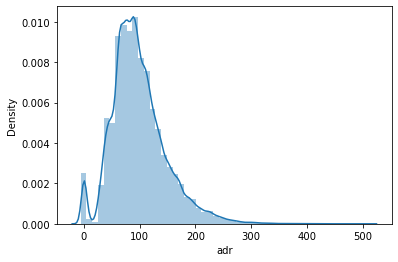

In [8]:
sns.distplot(filtered_data['adr'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

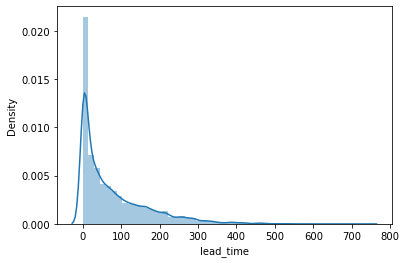

In [9]:
sns.distplot(filtered_data['lead_time'])

Text(0.5, 1.0, 'The mean is 76.89')

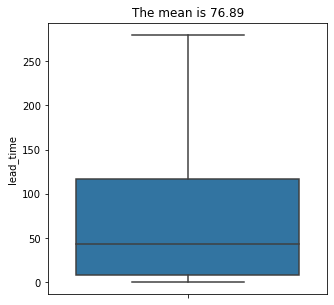

In [11]:
plt.figure(figsize=(5,5))
sns.boxplot(y=filtered_data['lead_time'], showfliers=False)
plt.title(f"The mean is {filtered_data['lead_time'].mean():.2f}")

Text(0.5, 1.0, 'The mean is 76.89')

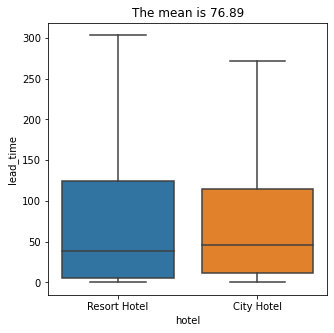

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(data =filtered_data, y='lead_time',x='hotel',showfliers=False)
plt.title(f"The mean is {filtered_data['lead_time'].mean():.2f}")

Text(0.5, 1.0, 'The mean is 76.89')

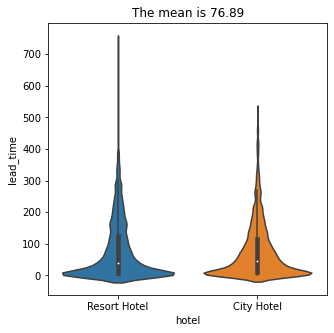

In [13]:
plt.figure(figsize=(5,5))
sns.violinplot(data =filtered_data, y='lead_time',x='hotel')
plt.title(f"The mean is {filtered_data['lead_time'].mean():.2f}")

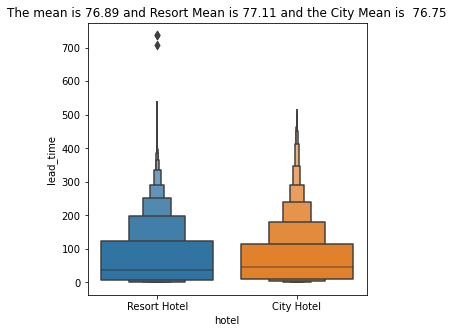

In [17]:
plt.figure(figsize=(5,5))
sns.boxenplot(data =filtered_data, y='lead_time',x='hotel')
resort_mean =filtered_data[filtered_data['hotel']=='Resort Hotel']['lead_time'].mean()
city_mean =filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'].mean()
plt.title(f"The mean is {filtered_data['lead_time'].mean():.2f} and Resort Mean is {resort_mean:.2f} and the City Mean is {city_mean: .2f}");

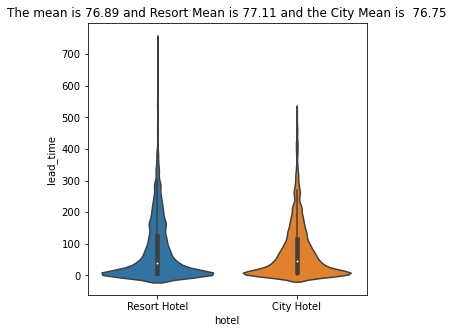

In [18]:
plt.figure(figsize=(5,5))
sns.violinplot(data =filtered_data, y='lead_time',x='hotel')
resort_mean =filtered_data[filtered_data['hotel']=='Resort Hotel']['lead_time'].mean()
city_mean =filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'].mean()
plt.title(f"The mean is {filtered_data['lead_time'].mean():.2f} and Resort Mean is {resort_mean:.2f} and the City Mean is {city_mean: .2f}");